In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [ ]:
# Sublinear scaling regime

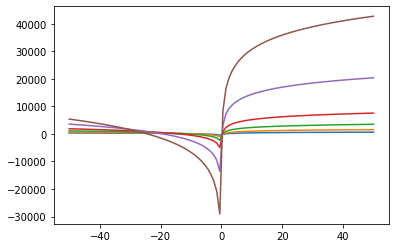

In [41]:
# Plot the PDF of the distribution 

# Parameters
p = np.array([250.1, 500.1, 1000.1, 2000.1, 5000.1, 10000.1])
T = 50 * np.ones(p.size)
n = p
sigma_sq = 0.25
gamma_sq = 0.25


for i, p_ in enumerate(p):

    # Distribution object
    dx2 = DChiSq(gamma_sq, sigma_sq, n[i] - T[i], T[i])
        
    # Domain of evaluation:
    x = np.linspace(-50.1, 50.1, 100)
    plt.plot(x, dx2.logPDF(x))

In [ ]:
# Sublinear scaling regime

In [3]:
import mpmath

In [13]:
float(mpmath.log(mpmath.hyperu(125, 125, 40)))

-462.52240946114244

135.0205054283142
137.0663845539093
138.2403872013092
136.98197102546692
133.3793478012085
135.42248463630676


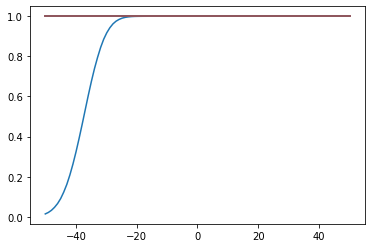

In [43]:
# Use Monte Carlo to try and approximate the CDF
# Parameters
p = np.array([250.1, 500.1, 1000.1, 2000.1, 5000.1, 10000.1])
T = 50 * np.ones(p.size)
n = p
sigma_sq = 0.25
gamma_sq = 0.25

for i, p_ in enumerate(p):

    # Distribution object
    dx2 = DChiSq(gamma_sq, sigma_sq, n[i] - T[i], T[i])
        
    # Domain of evaluation:
    x = np.linspace(-50.1, 50.1, 100)
    t0 = time.time()
    cdf = dx2.CDF(x)
    print(time.time() - t0)
    plt.plot(x, cdf)

In [50]:
# Does the mean seem to behave as we would expect
n_samples = int(1e7)
samples = np.zeros(n_samples)
for i in range(n_samples):
    
    samples[i] = 0.25 * np.random.chisquare(1000) - 0.5*np.random.chisquare(100)
    

In [51]:
np.mean(samples)

200.00294434306767

In [48]:
np.var(samples)

2199.909723853819

(array([1.89058557e-07, 1.64340901e-05, 5.33810337e-04, 5.83014577e-03,
        2.17029911e-02, 2.77006147e-02, 1.22328239e-02, 1.89797986e-03,
        1.04668419e-04, 2.03062895e-06]),
 array([125.26691873, 139.5482083 , 153.82949788, 168.11078745,
        182.39207703, 196.6733666 , 210.95465618, 225.23594575,
        239.51723533, 253.7985249 , 268.07981448]),
 <a list of 10 Patch objects>)

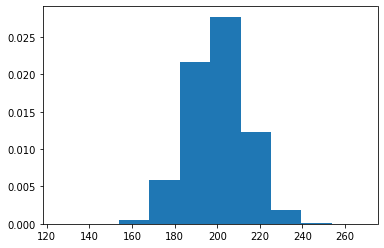

In [76]:
plt.hist(samples, density=True)

In [ ]:
# This looks like what we expect - can we reproduce this behavior with a trucnated evaluation of the PDF?

In [161]:
# Distribution object
dx2 = DChiSq(1, 1, 100, 10)

In [163]:
dx2.nPDF(np.array([-80]))

array([0.0229])

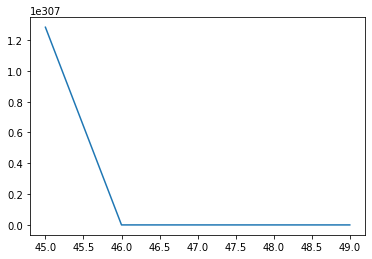

In [152]:
plt.plot(p)

In [ ]:
# Verify that the hyperu function breaks down in terms of 1F1 as expected

In [88]:
import mpmath as mp

In [144]:
a = 25
b = 200

In [148]:
x = np.linspace(1, 20)
fx = np.array([float(mp.log(mp.hyperu(a, b, xx))) for xx in x])

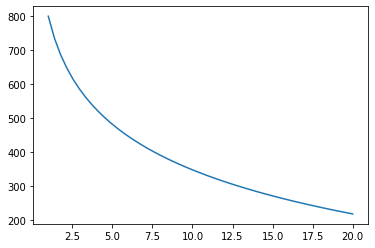

In [149]:
plt.plot(x, fx)

In [91]:
mp.gamma(1 - b)/mp.gamma(1 + a - b) * mp.hyp1f1(a, b, x) + mp.gamma(b - 1)/mp.gamma(a) * mp.power(x, 1 - b) * mp.hyp1f1(1 + a - b, 2 - b, x)

mpf('0.0')

In [111]:
mp.gamma(1 - b)/mp.gamma(1 + a - b) * mp.hyp1f1(a, b, x)

mpf('5.8713902291360313e-199')

In [112]:
mp.gamma(b - 1)/mp.gamma(a) * mp.power(x, 1 - b) * mp.hyp1f1(1 + a - b, 2 - b, x)

mpf('5.605378499081391e+143')